In [3]:
# imports 
from pyforest import *
import warnings
warnings.filterwarnings('ignore')
lazy_imports()

['import lightgbm as lgb',
 'from openpyxl import load_workbook',
 'from xlrd import open_workbook',
 'from sklearn.model_selection import StratifiedKFold',
 'from pyspark import SparkContext',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn.linear_model import Lasso',
 'from sklearn.impute import SimpleImputer',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from dask import dataframe as dd',
 'import spacy',
 'import bokeh',
 'import altair as alt',
 'from sklearn.model_selection import KFold',
 'import dash',
 'import tensorflow as tf',
 'from sklearn.decomposition import PCA',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import datetime as dt',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.model_selection import GridSearchCV',
 'import plotly.graph_objs as go',
 'from sklearn.linear_model import Ridge',
 'from sklearn import svm',
 'from sklearn.preprocessing imp

In [4]:
# read dataset
df_covid = pd.read_csv('dataset/imputed-data.csv',header = 0)
df_covid.head()

<IPython.core.display.Javascript object>

,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_visitation_grade,social_distancing_encounters_grade,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio,death_ratio,population_ratio_in_state
0,2020/01/22,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
1,2020/01/23,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
2,2020/01/24,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
3,2020/01/25,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047
4,2020/01/26,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,6,4,3,2,2,0.021048,0.010811,4.46047


In [5]:
# df_informations
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992266 entries, 0 to 992265
Data columns (total 64 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   date                                           992266 non-null  object 
 1   county_fips                                    992266 non-null  int64  
 2   county_name                                    992266 non-null  object 
 3   state_fips                                     992266 non-null  int64  
 4   state_name                                     992266 non-null  object 
 5   covid_19_confirmed_cases                       992266 non-null  float64
 6   covid_19_deaths                                992266 non-null  float64
 7   social_distancing_total_grade                  992266 non-null  object 
 8   social_distancing_visitation_grade             992266 non-null  object 
 9   social_distancing_encounters_grade   

In [6]:
# droping county and state name
# df_covid.drop(['county_name','state_name'],inplace = True, axis = 1)

DROPPED THE STRING COUNTERPARTS OF COUNTY_NAME AND STATE_NAME

In [7]:
# keeping columns name 
col_list = df_covid.columns
col_list

Index(['date', 'county_fips', 'county_name', 'state_fips', 'state_name',
       'covid_19_confirmed_cases', 'covid_19_deaths',
       'social_distancing_total_grade', 'social_distancing_visitation_grade',
       'social_distancing_encounters_grade',
       'social_distancing_travel_distance_grade',
       'retail_and_recreation_mobility_percent_change',
       'grocery_and_pharmacy_mobility_percent_change',
       'workplaces_mobility_percent_change', 'daily_state_test',
       'precipitation', 'temperature', 'percent_of_vaccinated_residents',
       'virus_pressure', 'total_population', 'proportion_female', 'area',
       'population_density', 'latitude', 'longitude', 'hospital_beds_ratio',
       'ventilator_capacity_ratio', 'intensive_care_unit_(ICU)_bed_ratio',
       'housing_density', 'less_than_high_school_diploma',
       'high_school_diploma_only', 'some_college_or_higher',
       'academic_population_ratio', 'percent_of_smokers',
       'percent_of_diabetes', 'religious_congr

In [8]:
# date as date format
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid['date'].head()

<IPython.core.display.Javascript object>

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: date, dtype: datetime64[ns]

CONVERTED DATE STRING TO DATE FORMAT

In [9]:
# max date
df_covid['date'].max()

Timestamp('2021-06-10 00:00:00')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

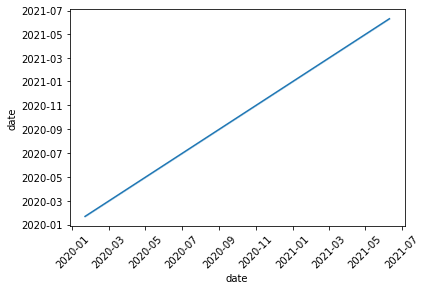

In [10]:
# checking pattern of date
sns.lineplot(x = 'date',y = 'date',data = df_covid )
plt.xticks(rotation=45);
plt.show()

OUR DATETIME IS CONTINUOUS

In [11]:
# country fipes unique len
len(df_covid.county_fips.unique())

1961

In [12]:
# state fipes unique
len(df_covid.state_fips.value_counts())

49

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='temperature', ylabel='covid_19_confirmed_cases'>

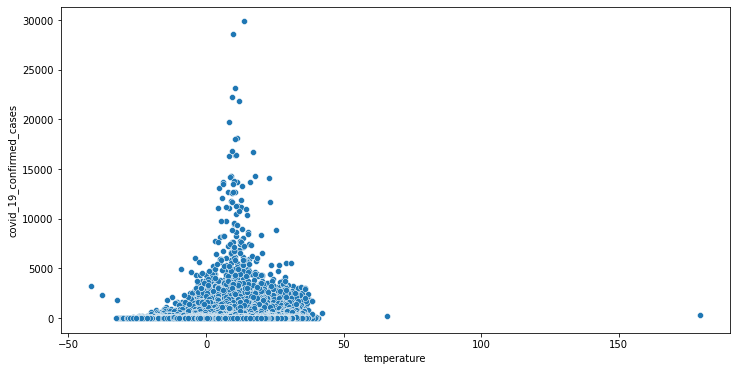

In [13]:
# overall temperature vs covid cases
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'temperature',y = 'covid_19_confirmed_cases',data = df_covid)

MAJORITY OF THE CASES ARE DETECTED WHEN TEMPERATURE IS BETWEEN -15 TO 40

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='covid_19_confirmed_cases'>

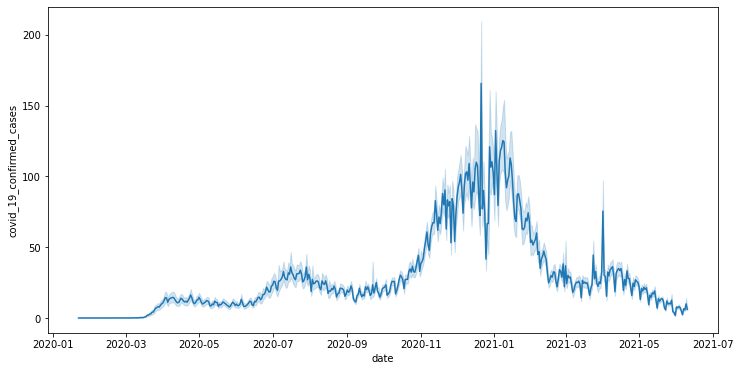

In [14]:
# overall date vs covid cases
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'covid_19_confirmed_cases', data = df_covid)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='daily_state_test'>

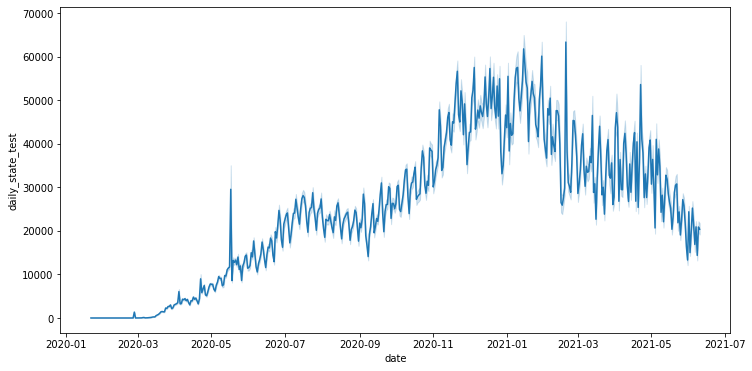

In [15]:
# overall date vs daily_state_test
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'daily_state_test', data = df_covid)

DAILY TEST INCREASED BASED ON COVID CASES INCREASE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='temperature'>

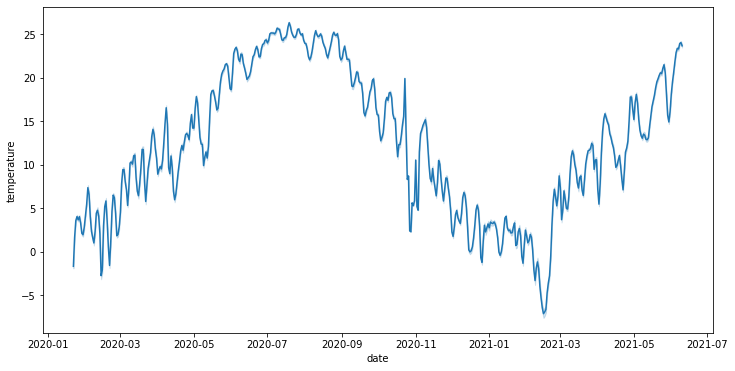

In [16]:
# overall date vs temp
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'temperature', data = df_covid)

In [17]:
# overall temp vs cases
df_covid[['temperature','covid_19_confirmed_cases','precipitation']].corr()

,temperature,covid_19_confirmed_cases,precipitation
temperature,1.000000,-0.023208,0.076432
covid_19_confirmed_cases,-0.023208,1.000000,-0.007544
precipitation,0.076432,-0.007544,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='covid_19_confirmed_cases'>

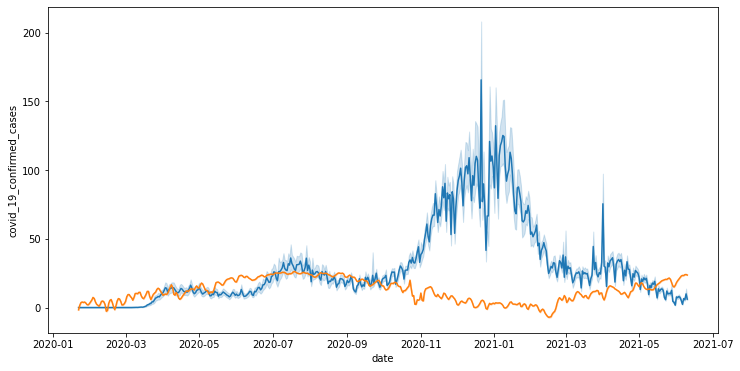

In [18]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'date', y = 'covid_19_confirmed_cases', data = df_covid)
sns.lineplot(x = 'date', y = 'temperature', data = df_covid)
#sns.lineplot(x = 'date', y = 'precipitation', data = df_covid)

DURING WINTERS CASES INCREASED, MAY BE BECAUSE PEOPLE STAYING MOSTLY INSIDE PUBLIC PLACE WHICH WAS A MAJOR FACTOR OF CASE SPREAD, DIRECTLY THEY ARE NOT CORRELATED. PRECIPITATION HAS NO RELATION.

In [32]:
# top high POPULATED counties
high_case = df_covid[df_covid['date'] == '2020-02-01'].groupby(['state_name'])[
    'total_population'].sum().sort_values(ascending = False)
high_case_10 = list(high_case.index[:10])
high_case_10

['California',
 'Texas',
 'Florida',
 'New York',
 'Pennsylvania',
 'Illinois',
 'North Carolina',
 'Ohio',
 'Michigan',
 'New Jersey']

In [48]:
# top low POPULATED counties
low_case = df_covid[df_covid['date'] == '2020-02-01'].groupby(['state_name'])[
    'total_population'].sum().sort_values(ascending = True)
low_case_10 = list(low_case.index[:10])
low_case_10

['Wyoming',
 'Vermont',
 'North Dakota',
 'South Dakota',
 'Montana',
 'Delaware',
 'Rhode Island',
 'Maine',
 'New Hampshire',
 'West Virginia']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state_name', ylabel='total_population'>

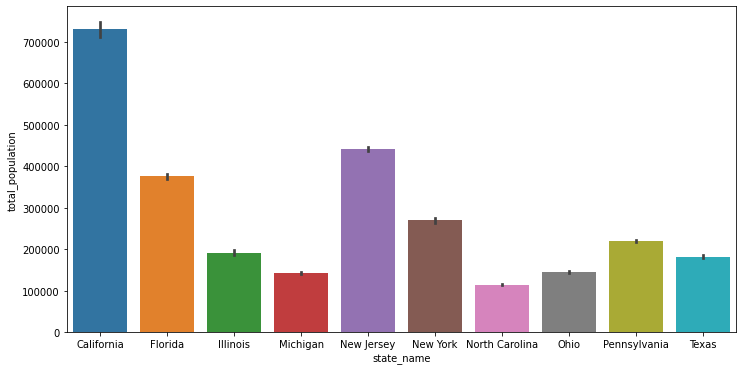

In [33]:
# TOP 10 STATES 
plt.figure(figsize = (12,6))
sns.barplot(x = 'state_name',y = 'total_population', data = df_covid[df_covid['state_name'].isin(high_case_10)])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state_name', ylabel='total_population'>

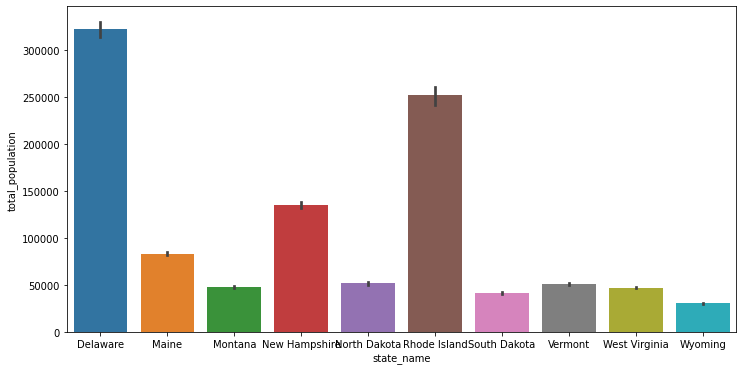

In [49]:
# LOW 10 STATES 
plt.figure(figsize = (12,6))
sns.barplot(x = 'state_name',y = 'total_population', data = df_covid[df_covid['state_name'].isin(low_case_10)])

THIS ARE THE TOP STATES BASED ON POPULATION DENSITY AND THE FOLLOWING WILL BE USED FOR FURTHER ANALYSIS

In [35]:
# number of counties in top high case counties
for i in high_case_10:
    print(i," : ",len(df_covid[df_covid['state_name'] ==i]['county_name'].unique()))

California  :  54
Texas  :  151
Florida  :  55
New York  :  54
Pennsylvania  :  55
Illinois  :  62
North Carolina  :  89
Ohio  :  69
Michigan  :  68
New Jersey  :  18


In [36]:
# t test one sample to check if sample qualify as a representation of population
from scipy import stats
def one_sample_one_tailed(sample_data, popmean, alpha=0.05, alternative='two-sided'):
    t, p = stats.ttest_1samp(sample_data, popmean)
    print ('t:',t)
    print ('p:',p)
    if alternative == 'greater' and (p/2 < alpha) and t > 0:
        print ('Reject Null Hypothesis for greater-than test')
    if alternative == 'less' and (p/2 < alpha) and t < 0:
        print ('Reject Null Hypothesis for less-thane test')
    if alternative == 'two-sided' and (p/2 < alpha) and t != 0:
        print ('Reject Null Hypothesis for not-equal test') 
one_sample_one_tailed(df_covid[df_covid['state_name'].isin(high_case_10)]['total_population']
                      ,df_covid['total_population'].mean())  

t: 89.16394543523985
p: 0.0
Reject Null Hypothesis for not-equal test


In [37]:
print(df_covid[df_covid['state_name'].isin(high_case_10)]['total_population'].mean())
print(df_covid['total_population'].mean())

243270.09925925927
150009.07700152983


In [43]:
# groupby for top population
covid_climate = df_covid[df_covid['state_name'].isin(high_case_10)].groupby(['date',
                                                             'state_name'])[['covid_19_confirmed_cases',
                'covid_19_deaths','daily_state_test','precipitation','virus_pressure']].sum().reset_index()
covid_climate.tail(10)

,date,state_name,covid_19_confirmed_cases,covid_19_deaths,daily_state_test,precipitation,virus_pressure
5050,2021-06-10,California,865.0,38.0,6929766.0,174.2,927.080556
5051,2021-06-10,Florida,0.0,0.0,0.0,1122.2,11.206349
5052,2021-06-10,Illinois,340.0,16.0,2628986.0,991.0,332.030159
5053,2021-06-10,Michigan,350.0,44.0,1462816.0,2028.4,373.084524
5054,2021-06-10,New Jersey,297.0,0.0,190836.0,328.0,328.957143
5055,2021-06-10,New York,357.0,6.0,7532568.0,1097.0,369.313095
5056,2021-06-10,North Carolina,467.0,16.0,1818448.0,7395.8,450.873810
5057,2021-06-10,Ohio,283.0,0.0,1656483.0,4995.4,281.633333
5058,2021-06-10,Pennsylvania,555.0,21.0,1501390.0,3254.2,452.002381
5059,2021-06-10,Texas,1715.0,33.0,4185418.0,144.0,1670.053571


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

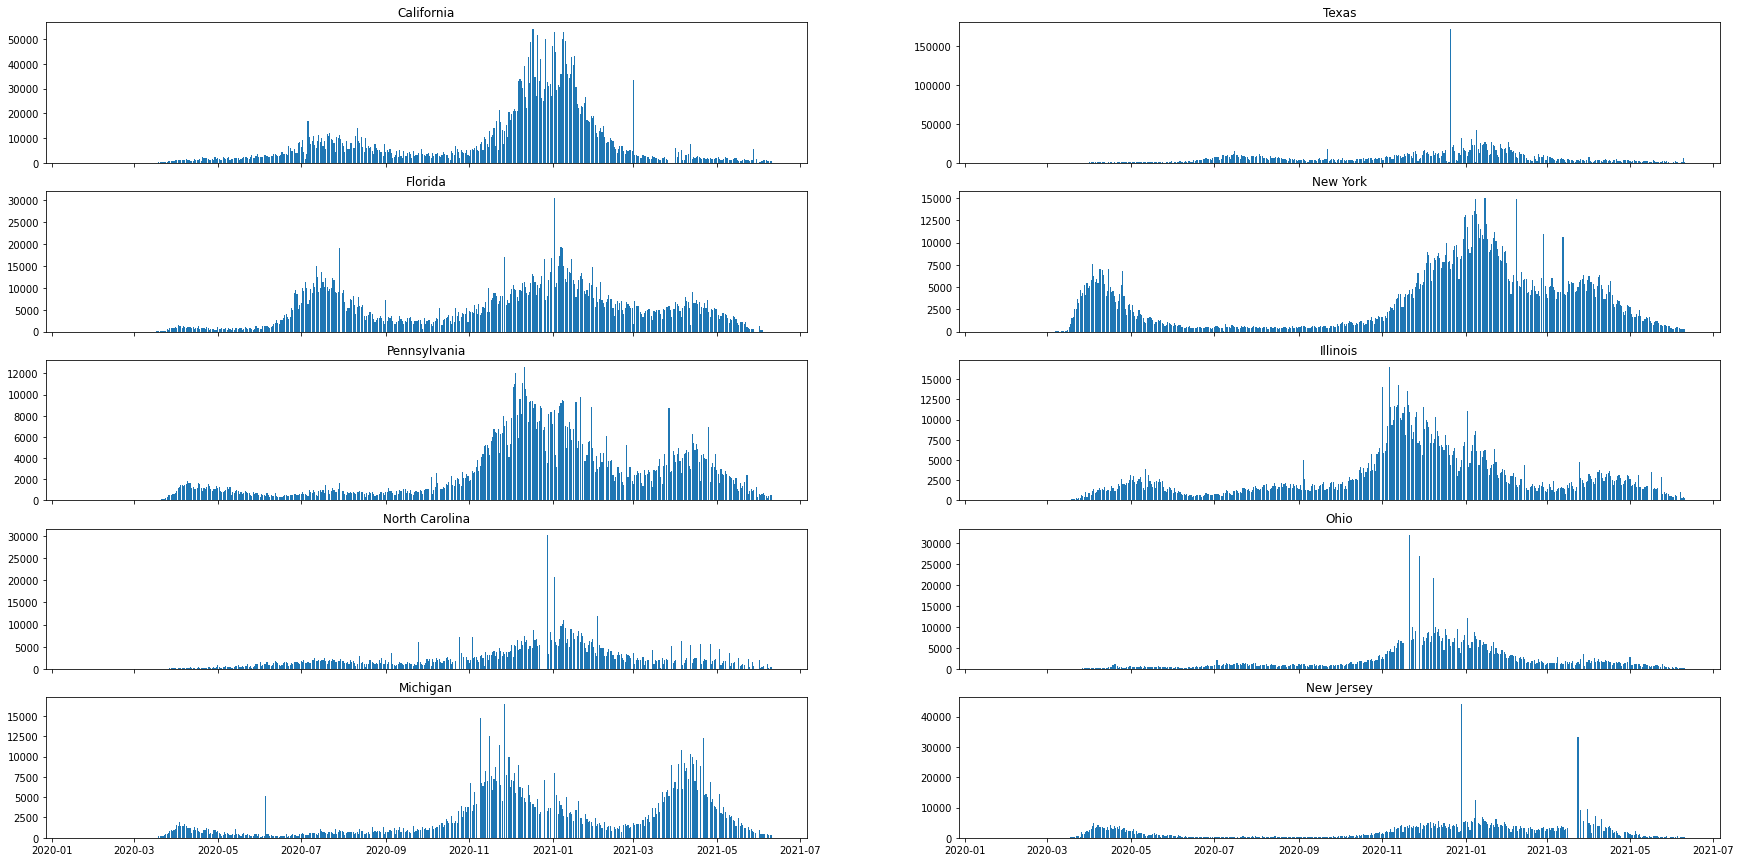

In [44]:
#top states with covid_19_confirmed_cases
plt.figure(figsize = (20,20))
fig,axes = plt.subplots(5,2,sharex = True,figsize = (30,15))

for i,ax in zip(high_case_10, axes.flat):    
    ax.bar(covid_climate.loc[np.where(covid_climate["state_name"] == i)[0],'date'],covid_climate.loc[
        np.where(covid_climate["state_name"] == i)[0],'covid_19_confirmed_cases'])
    ax.set_title(i)
    plt.title(str(i))

THE COVID CASES ARE NOT ACCUMULATED ! ALSO ALL STATES HAVE A SIMILAR PATTERN STATING THAT MAJOR SPREAD DURING WINTERS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x432 with 0 Axes>

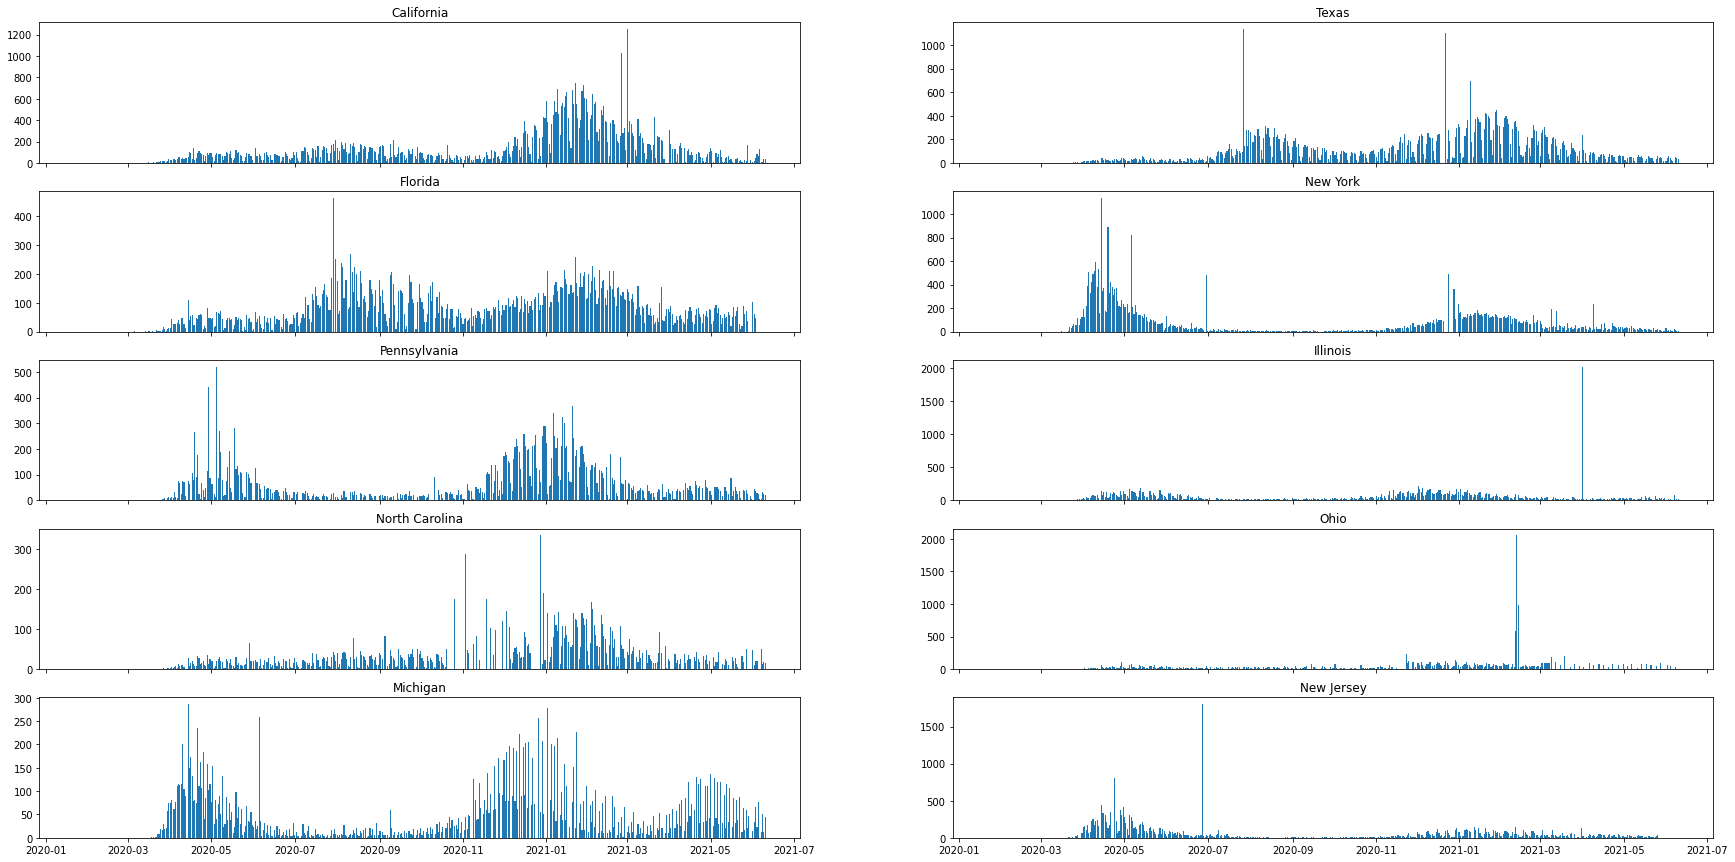

In [46]:
# top states with covid_19_DEATHS
plt.figure(figsize = (12,6))
fig,axes = plt.subplots(5,2,sharex = True,figsize = (30,15))

for i,ax in zip(high_case_10, axes.flat):    
    ax.bar(covid_climate.loc[np.where(covid_climate["state_name"] == i)[0],'date'],covid_climate.loc[
        np.where(covid_climate["state_name"] == i)[0],'covid_19_deaths'])
    ax.set_title(i)
    plt.title(str(i))

THE PATTERNS ARE SIMILAR TO COVID CASES . ALSO THE IS A SPIKE IN DEATH DURING INITIAL SPREAD AS WELL AS WINTERS.

<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  death_per_1000
casuality_per_1000            1.000000        0.134932
death_per_1000                0.134932        1.000000


<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  death_per_1000
casuality_per_1000            1.000000        0.645846
death_per_1000                0.645846        1.000000


<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  death_per_1000
casuality_per_1000            1.000000        0.415768
death_per_1000                0.415768        1.000000


<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  death_per_1000
casuality_per_1000            1.000000        0.618285
death_per_1000                0.618285        1.000000


<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  death_per_1000
casuality_per_1000            1.000000        0.565651
death_per_1000                0.565651        1.000000


<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  death_per_1000
casuality_per_1000            1.000000        0.642831
death_per_1000                0.642831        1.000000


<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  death_per_1000
casuality_per_1000            1.000000        0.174677
death_per_1000                0.174677        1.000000


<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  death_per_1000
casuality_per_1000            1.000000        0.387718
death_per_1000                0.387718        1.000000


<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  death_per_1000
casuality_per_1000            1.000000        0.369731
death_per_1000                0.369731        1.000000


<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  death_per_1000
casuality_per_1000            1.000000        0.773495
death_per_1000                0.773495        1.000000


<IPython.core.display.Javascript object>

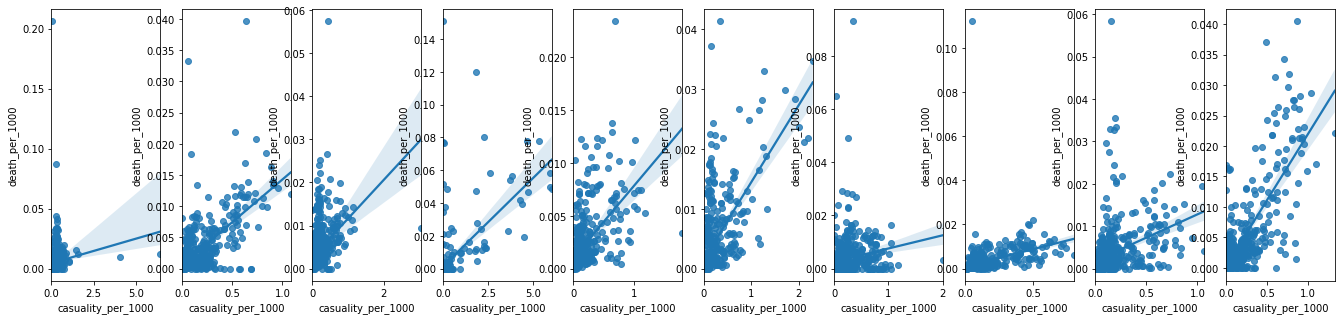

In [166]:
# confirmed case vs death
fig, axs = plt.subplots(ncols=10,figsize = (23,5))
for i in range(len(high_case_10)):
    print('state : ',high_case_10[0])
    print(covid_climate[covid_climate['state_name'] == high_case_10[i]][['covid_19_confirmed_cases',
                                                                         'covi_19_deaths']].corr())
    sns.regplot("covid_19_confirmed_cases", "covi_19_deaths",
           data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE WERE THAT THERE IS A CORRELATION OF COVID CASES WITH COVID DEATHS . THE RELATIONSHIP IS LOW AS IT IS PERIODICAL

<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  daily_state_test
casuality_per_1000            1.000000          0.184379
daily_state_test              0.184379          1.000000


<IPython.core.display.Javascript object>

state :  36
                    casuality_per_1000  daily_state_test
casuality_per_1000             1.00000           0.69209
daily_state_test               0.69209           1.00000


<IPython.core.display.Javascript object>

state :  25
                    casuality_per_1000  daily_state_test
casuality_per_1000            1.000000          0.535686
daily_state_test              0.535686          1.000000


<IPython.core.display.Javascript object>

state :  44
                    casuality_per_1000  daily_state_test
casuality_per_1000            1.000000          0.202794
daily_state_test              0.202794          1.000000


<IPython.core.display.Javascript object>

state :  6
                    casuality_per_1000  daily_state_test
casuality_per_1000            1.000000          0.624645
daily_state_test              0.624645          1.000000


<IPython.core.display.Javascript object>

state :  9
                    casuality_per_1000  daily_state_test
casuality_per_1000            1.000000          0.434116
daily_state_test              0.434116          1.000000


<IPython.core.display.Javascript object>

state :  10
                    casuality_per_1000  daily_state_test
casuality_per_1000            1.000000          0.648119
daily_state_test              0.648119          1.000000


<IPython.core.display.Javascript object>

state :  24
                    casuality_per_1000  daily_state_test
casuality_per_1000            1.000000          0.757849
daily_state_test              0.757849          1.000000


<IPython.core.display.Javascript object>

state :  51
                    casuality_per_1000  daily_state_test
casuality_per_1000            1.000000          0.732907
daily_state_test              0.732907          1.000000


<IPython.core.display.Javascript object>

state :  42
                    casuality_per_1000  daily_state_test
casuality_per_1000            1.000000          0.704054
daily_state_test              0.704054          1.000000


<IPython.core.display.Javascript object>

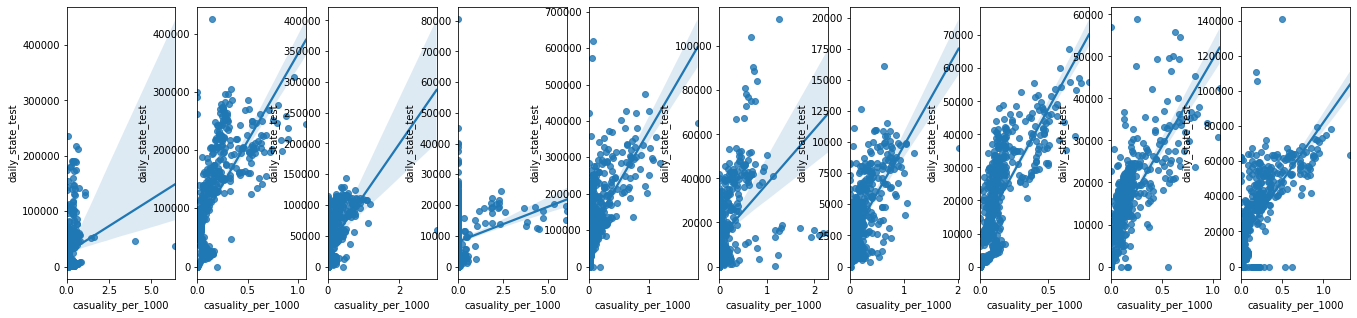

In [167]:
# confirmed case vs daily test
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covid_19_confirmed_cases'
                                                                     ,'daily_state_test']].corr())
    sns.regplot("covid_19_confirmed_cases", "daily_state_test",
           data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE WERE THAT THERE IS A CORRELATION OF COVID CASES WITH COVID TEST . THE RELATIONSHIP IS HIGH IN SOME CASES AND LOW IN OTHERS. IT MAY BE BECAUSE OF DIFFERENT POPULATION DENSITY

<IPython.core.display.Javascript object>

state :  34
                    temperature  casuality_per_1000
temperature            1.000000           -0.305911
casuality_per_1000    -0.305911            1.000000


<IPython.core.display.Javascript object>

state :  36
                    temperature  casuality_per_1000
temperature            1.000000           -0.514714
casuality_per_1000    -0.514714            1.000000


<IPython.core.display.Javascript object>

state :  25
                    temperature  casuality_per_1000
temperature            1.000000           -0.385313
casuality_per_1000    -0.385313            1.000000


<IPython.core.display.Javascript object>

state :  44
                    temperature  casuality_per_1000
temperature            1.000000           -0.164433
casuality_per_1000    -0.164433            1.000000


<IPython.core.display.Javascript object>

state :  6
                    temperature  casuality_per_1000
temperature            1.000000           -0.234955
casuality_per_1000    -0.234955            1.000000


<IPython.core.display.Javascript object>

state :  9
                    temperature  casuality_per_1000
temperature            1.000000           -0.334528
casuality_per_1000    -0.334528            1.000000


<IPython.core.display.Javascript object>

state :  10
                    temperature  casuality_per_1000
temperature            1.000000           -0.417239
casuality_per_1000    -0.417239            1.000000


<IPython.core.display.Javascript object>

state :  24
                    temperature  casuality_per_1000
temperature            1.000000           -0.364962
casuality_per_1000    -0.364962            1.000000


<IPython.core.display.Javascript object>

state :  51
                    temperature  casuality_per_1000
temperature            1.000000           -0.433237
casuality_per_1000    -0.433237            1.000000


<IPython.core.display.Javascript object>

state :  42
                    temperature  casuality_per_1000
temperature            1.000000           -0.442793
casuality_per_1000    -0.442793            1.000000


<IPython.core.display.Javascript object>

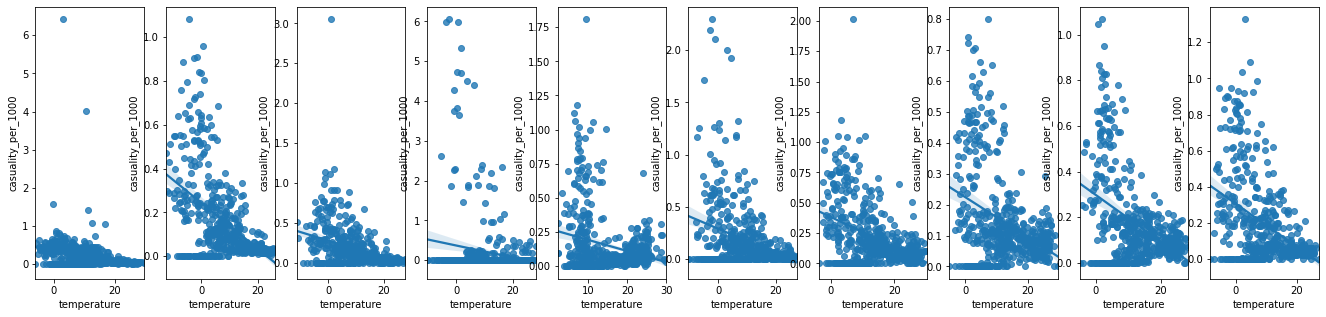

In [168]:
# temperature vs confirmed cases
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['temperature'
                                                                         ,'covid_19_confirmed_cases']].corr())
    sns.regplot("temperature", "covid_19_confirmed_cases",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])
   

HERE THERE IS NO DIRECT RELATIONSHIP BETWEEN TEMPERATURE VS COVID CASES

<IPython.core.display.Javascript object>

state :  34
                  temperature  daily_state_test
temperature          1.000000         -0.126529
daily_state_test    -0.126529          1.000000


<IPython.core.display.Javascript object>

state :  36
                  temperature  daily_state_test
temperature          1.000000         -0.284343
daily_state_test    -0.284343          1.000000


<IPython.core.display.Javascript object>

state :  25
                  temperature  daily_state_test
temperature          1.000000         -0.305979
daily_state_test    -0.305979          1.000000


<IPython.core.display.Javascript object>

state :  44
                  temperature  daily_state_test
temperature          1.000000         -0.237511
daily_state_test    -0.237511          1.000000


<IPython.core.display.Javascript object>

state :  6
                  temperature  daily_state_test
temperature          1.000000         -0.178462
daily_state_test    -0.178462          1.000000


<IPython.core.display.Javascript object>

state :  9
                  temperature  daily_state_test
temperature          1.000000         -0.158404
daily_state_test    -0.158404          1.000000


<IPython.core.display.Javascript object>

state :  10
                  temperature  daily_state_test
temperature           1.00000          -0.28101
daily_state_test     -0.28101           1.00000


<IPython.core.display.Javascript object>

state :  24
                  temperature  daily_state_test
temperature          1.000000         -0.164414
daily_state_test    -0.164414          1.000000


<IPython.core.display.Javascript object>

state :  51
                  temperature  daily_state_test
temperature          1.000000         -0.195064
daily_state_test    -0.195064          1.000000


<IPython.core.display.Javascript object>

state :  42
                  temperature  daily_state_test
temperature           1.00000          -0.23465
daily_state_test     -0.23465           1.00000


<IPython.core.display.Javascript object>

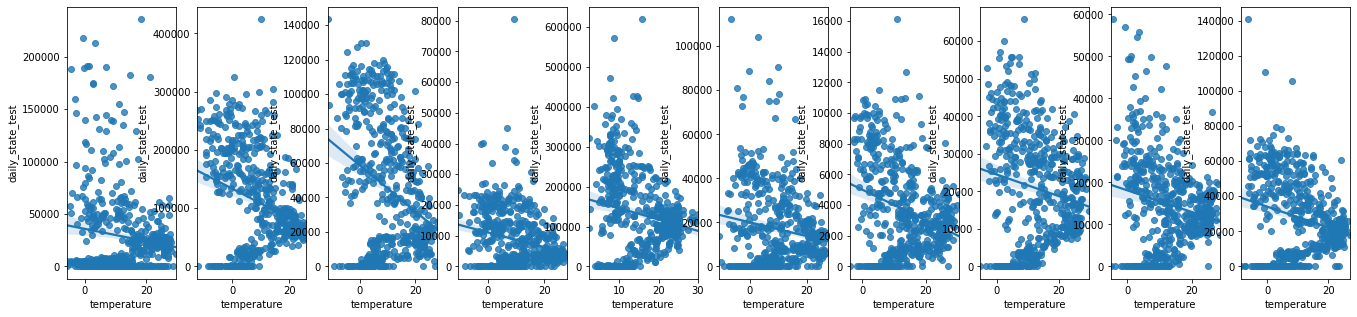

In [169]:
# temperature vs daily test
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['temperature'
                                                                 ,'daily_state_test']].corr())
    sns.regplot("temperature", "daily_state_test",
           data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE WERE THAT THERE IS A NEGATIVE CORRELATION OF COVID CASES WITH COVID DEATHS . THE RELATIONSHIP IS LOW AS IT IS PERIODICAL

<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.018469
daily_state_test      -0.018469          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.031649
daily_state_test       0.031649          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.007722
daily_state_test       0.007722          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.034003
daily_state_test       0.034003          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.056168
daily_state_test       0.056168          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.041256
daily_state_test       0.041256          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.007956
daily_state_test       0.007956          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.045132
daily_state_test       0.045132          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000         -0.019599
daily_state_test      -0.019599          1.000000


<IPython.core.display.Javascript object>

state :  34
                  precipitation  daily_state_test
precipitation          1.000000          0.080045
daily_state_test       0.080045          1.000000


<IPython.core.display.Javascript object>

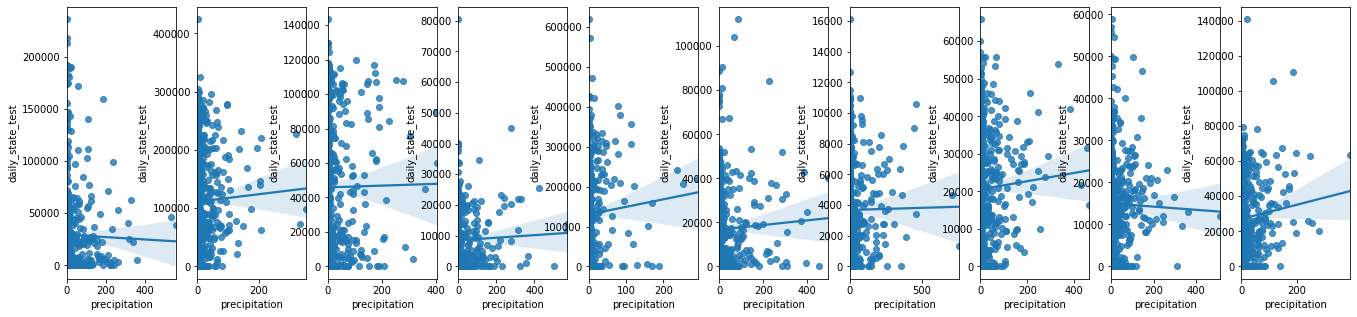

In [170]:
# precipitation vs daily test
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[0])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['precipitation'
                                                                         ,'daily_state_test']].corr())
    sns.regplot("precipitation", "daily_state_test",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

NO RELATIONSHIP

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='death_per_1000'>

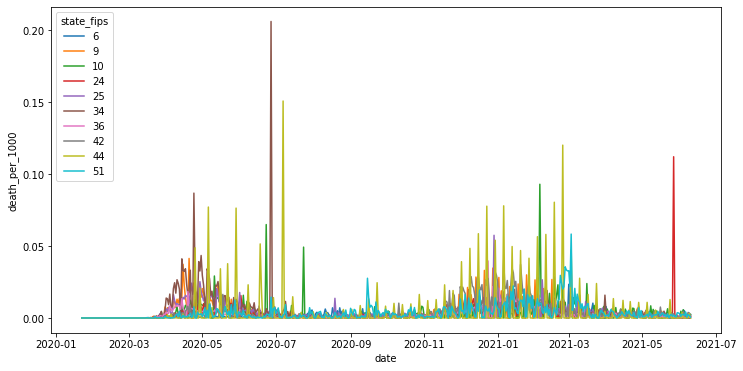

In [171]:
# top death in this five county
plt.figure(figsize = (12,6))
palette = sns.color_palette("tab10")
sns.lineplot(x = 'date', y = 'covi_19_deaths', hue = 'state_fips',data = covid_climate,palette = palette[:10])

In [172]:
# population_density vs total_population
# per county population density and total population stay same

<IPython.core.display.Javascript object>

state :  34
                    casuality_per_1000  virus_pressure
casuality_per_1000            1.000000        0.957968
virus_pressure                0.957968        1.000000


<IPython.core.display.Javascript object>

state :  36
                    casuality_per_1000  virus_pressure
casuality_per_1000            1.000000        0.946897
virus_pressure                0.946897        1.000000


<IPython.core.display.Javascript object>

state :  25
                    casuality_per_1000  virus_pressure
casuality_per_1000            1.000000        0.969291
virus_pressure                0.969291        1.000000


<IPython.core.display.Javascript object>

state :  44
                    casuality_per_1000  virus_pressure
casuality_per_1000            1.000000        0.807994
virus_pressure                0.807994        1.000000


<IPython.core.display.Javascript object>

state :  6
                    casuality_per_1000  virus_pressure
casuality_per_1000            1.000000        0.937727
virus_pressure                0.937727        1.000000


<IPython.core.display.Javascript object>

state :  9
                    casuality_per_1000  virus_pressure
casuality_per_1000            1.000000        0.874177
virus_pressure                0.874177        1.000000


<IPython.core.display.Javascript object>

state :  10
                    casuality_per_1000  virus_pressure
casuality_per_1000            1.000000        0.814899
virus_pressure                0.814899        1.000000


<IPython.core.display.Javascript object>

state :  24
                    casuality_per_1000  virus_pressure
casuality_per_1000            1.000000        0.964289
virus_pressure                0.964289        1.000000


<IPython.core.display.Javascript object>

state :  51
                    casuality_per_1000  virus_pressure
casuality_per_1000            1.000000        0.978222
virus_pressure                0.978222        1.000000


<IPython.core.display.Javascript object>

state :  42
                    casuality_per_1000  virus_pressure
casuality_per_1000            1.000000        0.986319
virus_pressure                0.986319        1.000000


<IPython.core.display.Javascript object>

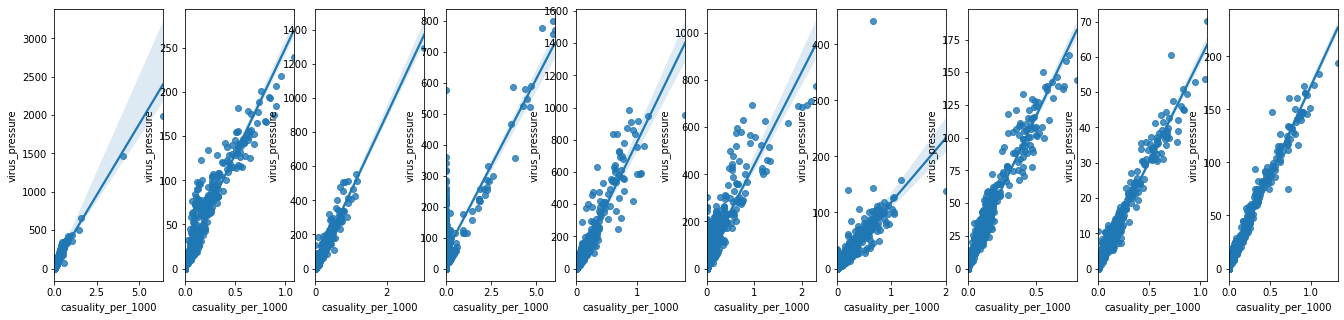

In [173]:
# confirmed case vs virus_pressure
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covid_19_confirmed_cases'
                                                                         ,'virus_pressure']].corr())
    sns.regplot("covid_19_confirmed_cases", "virus_pressure",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE THERE IS A VERY HIGH CORRELATION BETWEEN VIRUS PRESSURE VS COVID CASES

<IPython.core.display.Javascript object>

state :  34
                death_per_1000  virus_pressure
death_per_1000        1.000000        0.178278
virus_pressure        0.178278        1.000000


<IPython.core.display.Javascript object>

state :  36
                death_per_1000  virus_pressure
death_per_1000        1.000000        0.664971
virus_pressure        0.664971        1.000000


<IPython.core.display.Javascript object>

state :  25
                death_per_1000  virus_pressure
death_per_1000        1.000000        0.483163
virus_pressure        0.483163        1.000000


<IPython.core.display.Javascript object>

state :  44
                death_per_1000  virus_pressure
death_per_1000        1.000000        0.472083
virus_pressure        0.472083        1.000000


<IPython.core.display.Javascript object>

state :  6
                death_per_1000  virus_pressure
death_per_1000        1.000000        0.557733
virus_pressure        0.557733        1.000000


<IPython.core.display.Javascript object>

state :  9
                death_per_1000  virus_pressure
death_per_1000        1.000000        0.646905
virus_pressure        0.646905        1.000000


<IPython.core.display.Javascript object>

state :  10
                death_per_1000  virus_pressure
death_per_1000         1.00000         0.16654
virus_pressure         0.16654         1.00000


<IPython.core.display.Javascript object>

state :  24
                death_per_1000  virus_pressure
death_per_1000        1.000000        0.409052
virus_pressure        0.409052        1.000000


<IPython.core.display.Javascript object>

state :  51
                death_per_1000  virus_pressure
death_per_1000        1.000000        0.371069
virus_pressure        0.371069        1.000000


<IPython.core.display.Javascript object>

state :  42
                death_per_1000  virus_pressure
death_per_1000        1.000000        0.773512
virus_pressure        0.773512        1.000000


<IPython.core.display.Javascript object>

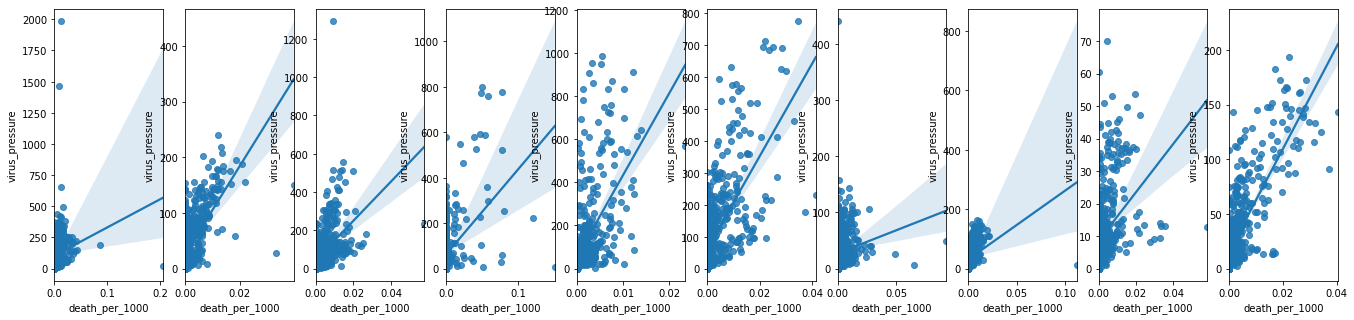

In [174]:
# covid death vs virus_pressure
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['covi_19_deaths'
                                                                         ,'virus_pressure']].corr())
    sns.regplot("covi_19_deaths", "virus_pressure",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

HERE THERE IS A SIGNIFICANT RELATION BUT NOT DIRECTLY CORRELATED

<IPython.core.display.Javascript object>

state :  34
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.232939
virus_pressure            0.232939        1.000000


<IPython.core.display.Javascript object>

state :  36
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.649572
virus_pressure            0.649572        1.000000


<IPython.core.display.Javascript object>

state :  25
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.521314
virus_pressure            0.521314        1.000000


<IPython.core.display.Javascript object>

state :  44
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.388362
virus_pressure            0.388362        1.000000


<IPython.core.display.Javascript object>

state :  6
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.649291
virus_pressure            0.649291        1.000000


<IPython.core.display.Javascript object>

state :  9
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.479846
virus_pressure            0.479846        1.000000


<IPython.core.display.Javascript object>

state :  10
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.633819
virus_pressure            0.633819        1.000000


<IPython.core.display.Javascript object>

state :  24
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.755542
virus_pressure            0.755542        1.000000


<IPython.core.display.Javascript object>

state :  51
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.748017
virus_pressure            0.748017        1.000000


<IPython.core.display.Javascript object>

state :  42
                  daily_state_test  virus_pressure
daily_state_test          1.000000        0.712095
virus_pressure            0.712095        1.000000


<IPython.core.display.Javascript object>

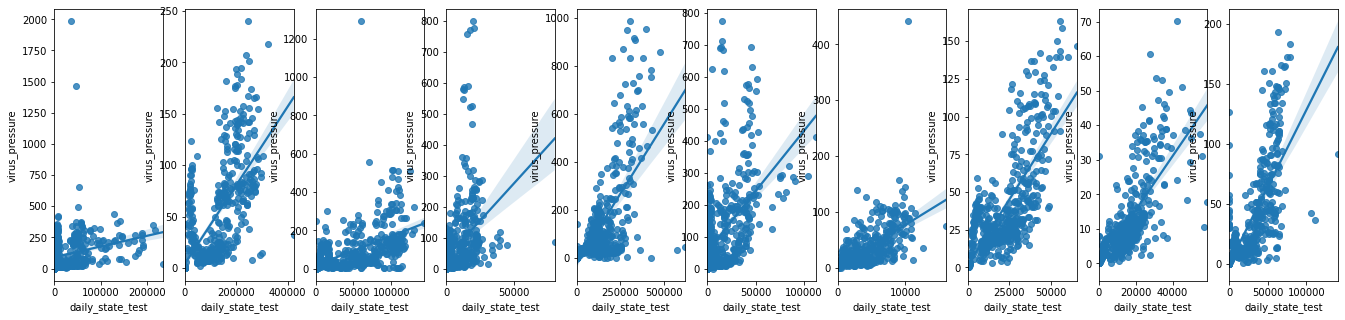

In [175]:
# daily_state_test vs virus_pressure
fig, axs = plt.subplots(ncols=10,figsize = (23,5))

for i in range(len(high_case_10)):
    print('state : ',high_case_10[i])
    print(covid_climate[covid_climate['state_fips'] == high_case_10[i]][['daily_state_test'
                                                                         ,'virus_pressure']].corr())
    sns.regplot("daily_state_test", "virus_pressure",
               data = covid_climate[covid_climate['state_fips'] == high_case_10[i]],ax=axs[i])

THERE IS A SIGNIFICANT CORRELATION

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='death_ratio_mean'>

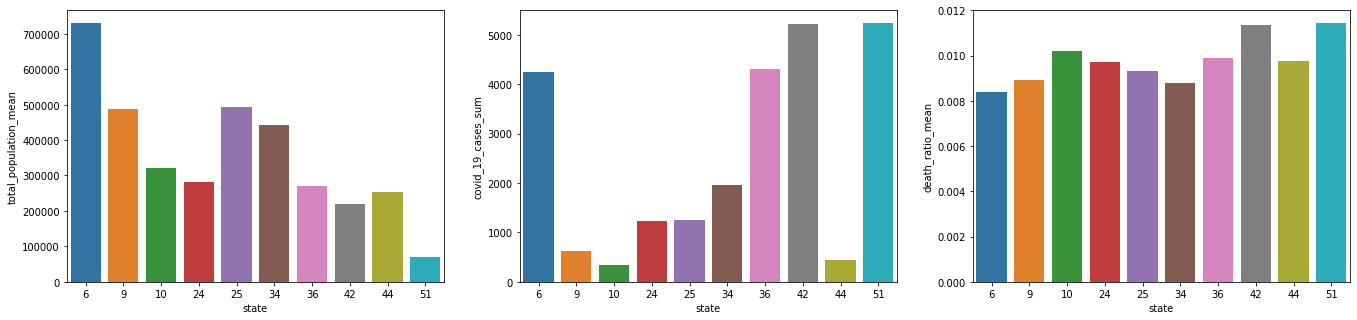

In [176]:
# total_population vs covid cases vs death ratio

covid_sum = []
pop_mean = []
death_mean = []
#print('state : ',high_case_10[0])
for i in range(len(high_case_10)):
    covid_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].sum())
    pop_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['total_population'].mean())
    death_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['death_ratio'].mean())


df_ta1 = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':covid_sum,
                       'total_population_mean':pop_mean,'death_ratio_mean':death_mean})

fig, axs = plt.subplots(ncols=3,figsize = (23,5))
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_ta1 ,ax = axs[1])
sns.barplot(x = 'state',y ='total_population_mean',data = df_ta1 ,ax = axs[0])
sns.barplot(x = 'state',y ='death_ratio_mean',data = df_ta1 ,ax = axs[2])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state_fips', ylabel='death_per_1000'>

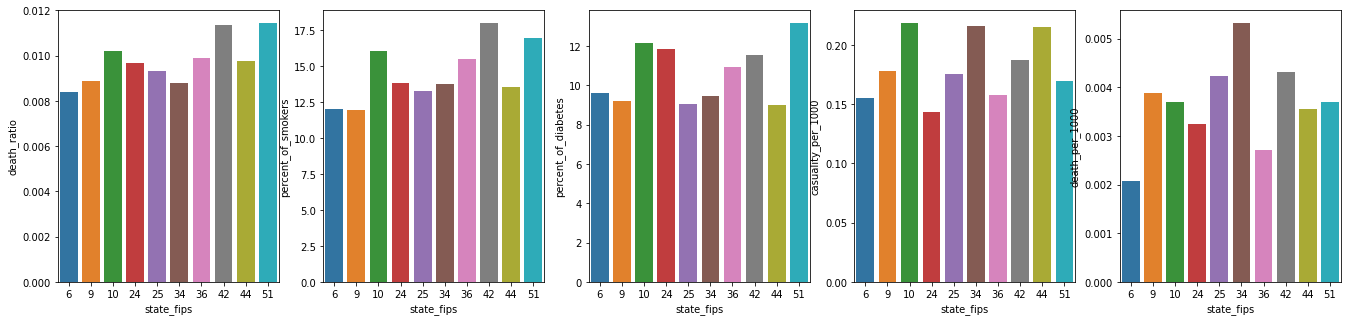

In [177]:
# death ratio, percent of smoker, diabetes, covid 19 death, covid 19 cases 

death_relation = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['state_fips'])[['death_ratio',
            'percent_of_smokers','percent_of_diabetes','covi_19_deaths','covid_19_confirmed_cases']].mean().reset_index()

fig, axs = plt.subplots(ncols=5,figsize = (23,5))
sns.barplot(x = 'state_fips',y ='death_ratio',data = death_relation ,ax = axs[0])
sns.barplot(x = 'state_fips',y ='percent_of_smokers',data = death_relation ,ax = axs[1])
sns.barplot(x = 'state_fips',y ='percent_of_diabetes',data = death_relation ,ax = axs[2])
sns.barplot(x = 'state_fips',y ='covid_19_confirmed_cases',data = death_relation ,ax = axs[3])
sns.barplot(x = 'state_fips',y ='covi_19_deaths',data = death_relation ,ax = axs[4])
#death_relation.head()

DEATH RATIO, SMOKERS , AND DIABETES HAVE RELATIONSHIP AMONG THEMSELF

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state_fips', ylabel='casuality_per_1000'>

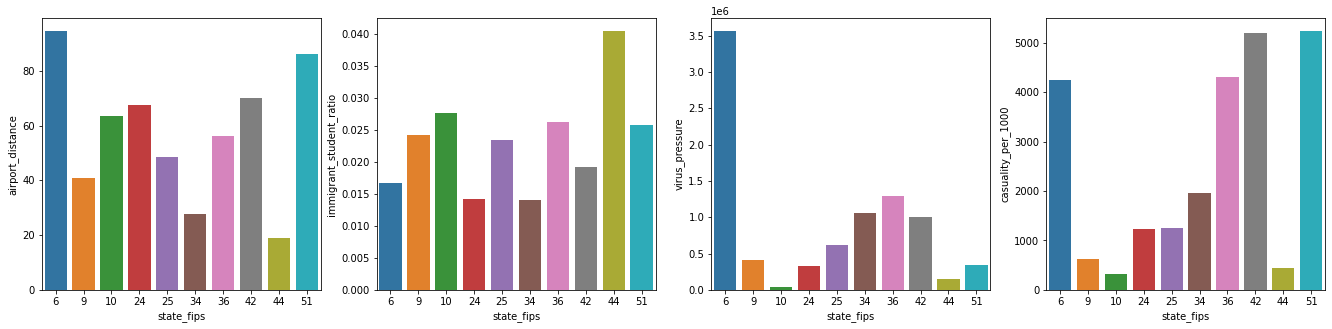

In [178]:
# airport distance , immigration student ratio covid cases , virus pressure
covid_spread1 = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['state_fips'])[['airport_distance',
            'immigrant_student_ratio']].mean().reset_index()

covid_spread2 = df_covid[df_covid['state_fips'].isin(high_case_10)].groupby(['state_fips'])[['virus_pressure',
            'covid_19_confirmed_cases']].sum().reset_index()

fig, axs = plt.subplots(ncols=4,figsize = (23,5))
sns.barplot(x = 'state_fips',y ='airport_distance',data = covid_spread1 ,ax = axs[0])
sns.barplot(x = 'state_fips',y ='immigrant_student_ratio',data = covid_spread1 ,ax = axs[1])
sns.barplot(x = 'state_fips',y ='virus_pressure',data = covid_spread2 ,ax = axs[2])
sns.barplot(x = 'state_fips',y ='covid_19_confirmed_cases',data = covid_spread2 ,ax = axs[3])

HERE MORE THE DISTANCE LESS THE IMMIGRATION RATIO

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='covid_19_cases_sum'>

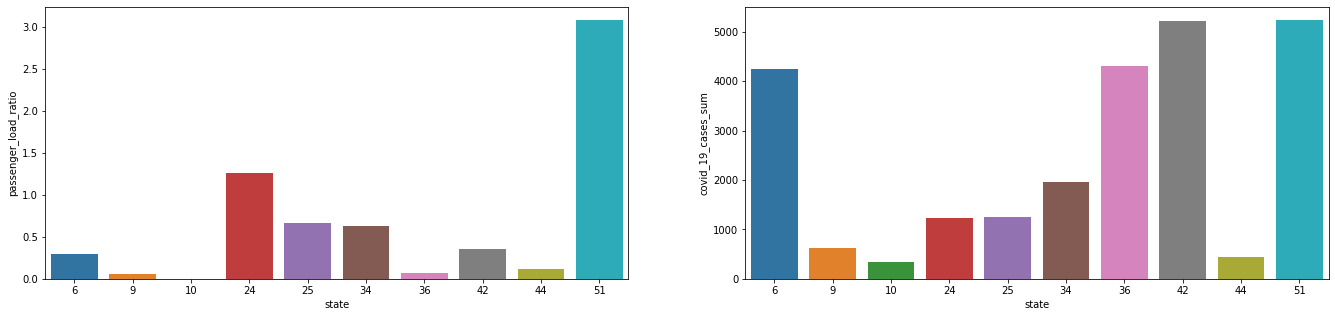

In [179]:
# geography
pass_load = []
cov_sum = []
for i in range(len(high_case_10)):
    pass_load.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['passenger_load_ratio'].mean())
    cov_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].sum())

df_geo = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':cov_sum,
                       'passenger_load_ratio':pass_load})

fig, axs = plt.subplots(ncols=2,figsize = (23,5))
sns.barplot(x = 'state',y ='passenger_load_ratio',data = df_geo ,ax = axs[0])
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_geo ,ax = axs[1])

HERE PASSENGER RATIO LESS, MORE COVID CASES

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='number_of_meat_plants'>

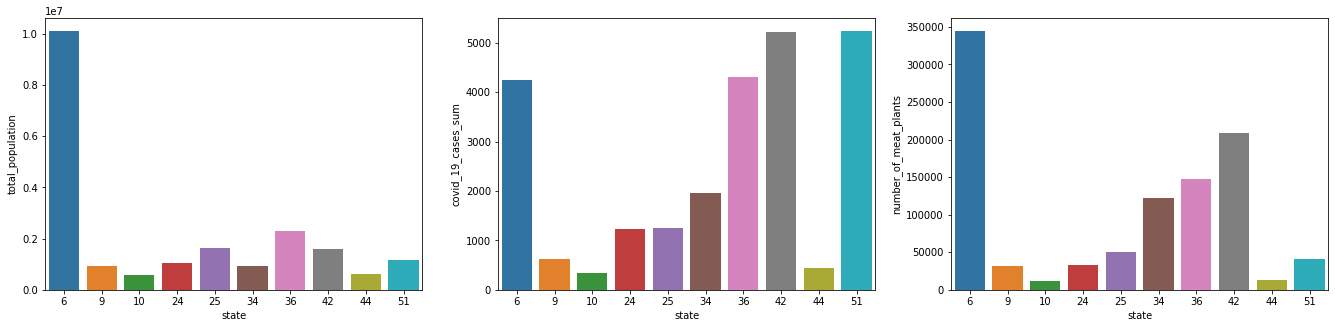

In [180]:
# geography
pop = []
cov_sum = []
meat_mean = []
for i in range(len(high_case_10)):
    pop.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['total_population'].max())
    meat_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['number_of_meat_plants'].sum())
    cov_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].sum())

df_geo = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':cov_sum,
                       'number_of_meat_plants':meat_mean,'total_population':pop})

fig, axs = plt.subplots(ncols=3,figsize = (23,5))
sns.barplot(x = 'state',y ='total_population',data = df_geo ,ax = axs[0])
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_geo ,ax = axs[1])
sns.barplot(x = 'state',y ='number_of_meat_plants',data = df_geo ,ax = axs[2])

MORE POPULATION , MORE MEAT PLANT. MORE POPULATION , MORE CASES. BUT WE CANNOT SAY MORE MEAT PLANT RESULT IN MORE CASES.

In [181]:
# percent of insured 
df_insured = df_covid[df_covid['state_fips'].isin(high_case_10)]

grp1 = df_insured.groupby(['state_fips'])[['percent_of_insured_residents','covid_19_confirmed_cases']].mean().reset_index()

#sns.barplot(x = 'state_fips', y ='covid_19_confirmed_cases',order = grp1['percent_of_insured_residents'],data = grp1)
grp1.head()

,state_fips,percent_of_insured_residents,casuality_per_1000
0,6,92.216157,0.155277
1,9,94.356782,0.177908
2,10,93.614031,0.218294
3,24,93.449569,0.143484
4,25,96.543843,0.175539


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='state', ylabel='median_household_income'>

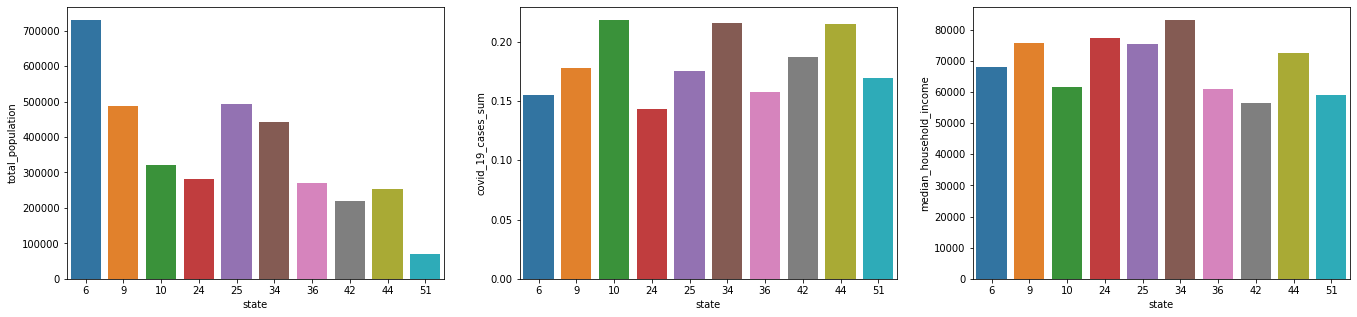

In [182]:
# # covid cases fix

pop = []
cov_sum = []
income_mean = []
for i in range(len(high_case_10)):
    pop.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['total_population'].mean())
    income_mean.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['median_household_income'].mean())
    cov_sum.append(df_covid[df_covid['state_fips'] == high_case_10[i]]['covid_19_confirmed_cases'].mean())

df_geo = pd.DataFrame({'state':high_case_10,'covid_19_cases_sum':cov_sum,
                       'median_household_income':income_mean,'total_population':pop})

fig, axs = plt.subplots(ncols=3,figsize = (23,5))
sns.barplot(x = 'state',y ='total_population',data = df_geo ,ax = axs[0])
sns.barplot(x = 'state',y ='covid_19_cases_sum',data = df_geo ,ax = axs[1])
sns.barplot(x = 'state',y ='median_household_income',data = df_geo ,ax = axs[2])

In [183]:
# Modelling

In [184]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992266 entries, 0 to 992265
Data columns (total 66 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   date                                           992266 non-null  datetime64[ns]
 1   county_fips                                    992266 non-null  int64         
 2   county_name                                    992266 non-null  object        
 3   state_fips                                     992266 non-null  int64         
 4   state_name                                     992266 non-null  object        
 5   covid_19_confirmed_cases                       992266 non-null  float64       
 6   covid_19_deaths                                992266 non-null  float64       
 7   social_distancing_total_grade                  992266 non-null  object        
 8   social_distancing_visitation_grade          

In [185]:
df_covid['Casuality_death'] = df_covid['covi_19_deaths']/df_covid['covid_19_confirmed_cases'] 

In [186]:
df_train = df_covid[['date','state_fips','total_population','number_of_meat_plants','Casuality_death',
                    'daily_state_test','temperature','virus_pressure','social_distancing_total_grade',
                     'political_party','religious_congregation_ratio','retail_and_recreation_mobility_percent_change',
                     'percent_of_vaccinated_residents',
                     ,'gdp_per_capita']].copy()
df_train = df_train[df_train['state_fips'].isin(high_case_10)]
df_train.head()

,date,state_fips,total_population,number_of_meat_plants,casuality_per_1000,daily_state_test,temperature,virus_pressure,social_distancing_total_grade,political_party,religious_congregation_ratio,gdp_per_capita
61226,2020-01-22,6,1666753,56,0.0,1.0,5.88,0.0,F,1,34.0,79.52
61227,2020-01-23,6,1666753,56,0.0,1.0,8.92,0.0,F,1,34.0,79.52
61228,2020-01-24,6,1666753,56,0.0,0.0,9.32,0.0,F,1,34.0,79.52
61229,2020-01-25,6,1666753,56,0.0,0.0,11.72,0.0,F,1,34.0,79.52
61230,2020-01-26,6,1666753,56,0.0,0.0,7.30,0.0,F,1,34.0,79.52


In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145222 entries, 61226 to 921425
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   date                           145222 non-null  datetime64[ns]
 1   state_fips                     145222 non-null  int64         
 2   total_population               145222 non-null  int64         
 3   number_of_meat_plants          145222 non-null  int64         
 4   casuality_per_1000             145222 non-null  float64       
 5   daily_state_test               145222 non-null  float64       
 6   temperature                    145222 non-null  float64       
 7   virus_pressure                 145222 non-null  float64       
 8   social_distancing_total_grade  145222 non-null  object        
 9   political_party                145222 non-null  int64         
 10  religious_congregation_ratio   145222 non-null  float64       
 

In [188]:
# handling date attributes
df_train['day_wk'] = df_train.date.dt.dayofweek
df_train['year'] = df_train.date.dt.year
df_train['month'] = df_train.date.dt.month
df_train['quarter'] = df_train.date.dt.quarter
df_train.head()

,date,state_fips,total_population,number_of_meat_plants,casuality_per_1000,daily_state_test,temperature,virus_pressure,social_distancing_total_grade,political_party,religious_congregation_ratio,gdp_per_capita,day_wk,year,month,quarter
61226,2020-01-22,6,1666753,56,0.0,1.0,5.88,0.0,F,1,34.0,79.52,2,2020,1,1
61227,2020-01-23,6,1666753,56,0.0,1.0,8.92,0.0,F,1,34.0,79.52,3,2020,1,1
61228,2020-01-24,6,1666753,56,0.0,0.0,9.32,0.0,F,1,34.0,79.52,4,2020,1,1
61229,2020-01-25,6,1666753,56,0.0,0.0,11.72,0.0,F,1,34.0,79.52,5,2020,1,1
61230,2020-01-26,6,1666753,56,0.0,0.0,7.30,0.0,F,1,34.0,79.52,6,2020,1,1


In [189]:
high_case_10

[34, 36, 25, 44, 6, 9, 10, 24, 51, 42]

In [190]:
len(df_covid[(df_covid['date'] <= '2021-03-01')])

794205

In [191]:
len(df_covid[(df_covid['date'] >= '2021-03-01')])

200022

In [192]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_train.loc[:,~df_train.columns.isin(['Casuality_death'
                                                                                        ,'date'])]
                                    ,df_train['covid_19_confirmed_cases'],test_size = 0.3,shuffle = True)


X_train.head()

,state_fips,total_population,number_of_meat_plants,daily_state_test,temperature,virus_pressure,social_distancing_total_grade,political_party,religious_congregation_ratio,gdp_per_capita,day_wk,year,month,quarter
558963,36,44527,4,201442.0,1.7,45.125000,D+,1,44.0,38.21,5,2020,12,4
563309,36,111755,2,49952.0,8.0,0.750000,F,1,34.0,51.64,0,2020,6,2
79832,6,752660,21,260910.0,12.2,156.833333,F,1,44.0,39.96,0,2021,2,1
372108,24,150926,4,28583.0,23.9,10.125000,F,0,38.0,47.08,4,2020,8,3
87548,6,220408,8,0.0,11.2,0.000000,F,1,36.0,63.97,5,2020,2,1


In [193]:
y_test.head()

379957    0.214307
66859     0.000000
723974    0.194712
378582    0.273608
903549    0.326264
Name: casuality_per_1000, dtype: float64

In [194]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43567 entries, 379957 to 890993
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_fips                     43567 non-null  int64  
 1   total_population               43567 non-null  int64  
 2   number_of_meat_plants          43567 non-null  int64  
 3   daily_state_test               43567 non-null  float64
 4   temperature                    43567 non-null  float64
 5   virus_pressure                 43567 non-null  float64
 6   social_distancing_total_grade  43567 non-null  object 
 7   political_party                43567 non-null  int64  
 8   religious_congregation_ratio   43567 non-null  float64
 9   gdp_per_capita                 43567 non-null  float64
 10  day_wk                         43567 non-null  int64  
 11  year                           43567 non-null  int64  
 12  month                          43567 non

In [195]:
# categorical encoding
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('encoder',OneHotEncoder(),[0,6,7,10,11,12,13])],remainder = 'passthrough')
sc = StandardScaler(with_mean=False)

X_train_tr = ct.fit_transform(X_train)
X_train_tr = sc.fit_transform(X_train_tr)
X_test_tr = ct.transform(X_test)
X_test_tr = sc.transform(X_test_tr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [196]:
# model
model_xgb = xgb.XGBRegressor(learning_rate = 0.1,n_estimators = 1000,max_depth = 5).fit(X_train_tr,y_train)

<IPython.core.display.Javascript object>

In [197]:
y_pred = model_xgb.predict(X_test_tr)

metrics.r2_score(y_test,y_pred)

<IPython.core.display.Javascript object>

0.5472541601297394

In [198]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.22782725738812262

In [199]:
y_test.mean()

0.1719687426460548

In [200]:
 model_xgb.feature_importances_

array([2.01462451e-02, 1.52726155e-02, 1.49404919e-02, 6.09011482e-03,
       4.21256945e-03, 6.94078505e-02, 9.28702578e-03, 5.03196791e-02,
       7.74921924e-02, 2.98406798e-02, 5.14945677e-05, 1.66661269e-03,
       3.35968006e-03, 1.84584875e-03, 1.22166472e-03, 1.40579203e-02,
       5.65359974e-03, 1.42638506e-02, 1.04342168e-02, 2.27359459e-02,
       3.59310838e-03, 5.36942855e-03, 3.28251021e-03, 0.00000000e+00,
       9.25177243e-03, 1.20697673e-02, 9.23856646e-02, 4.62716119e-03,
       9.56413057e-03, 3.46357259e-03, 7.38202501e-03, 1.97635088e-02,
       0.00000000e+00, 9.54846889e-02, 2.76549477e-02, 3.20784748e-03,
       8.85927305e-03, 5.96193131e-03, 7.37487851e-03, 4.87572141e-03,
       2.97786612e-02, 7.30389450e-03, 8.66115838e-03, 2.45556105e-02,
       8.02654102e-02, 7.07965391e-03, 4.24681511e-03, 8.80331174e-03,
       8.68002139e-03, 1.92560796e-02, 1.36691500e-02, 1.32546369e-02,
       1.39570897e-02, 3.16673256e-02, 2.36279275e-02, 8.72094836e-03],
     

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='casuality_per_1000'>

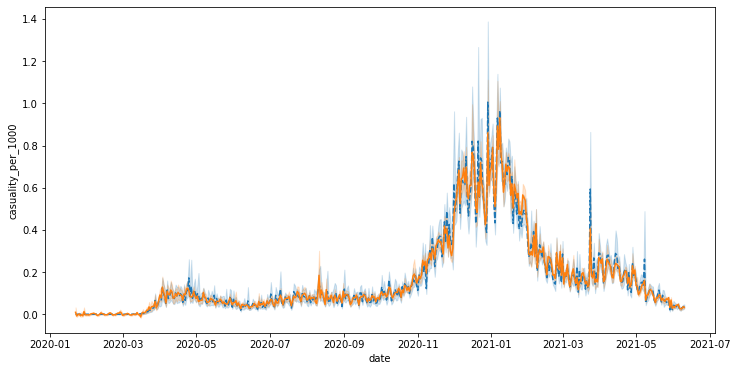

In [201]:
plt.figure(figsize = (12,6))
plot_test = df_train.loc[y_test.index]
plot_test.head()
plot_test['predicted_cases'] = y_pred
sns.lineplot(x = plot_test['date'],
             y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
sns.lineplot(x = plot_test['date'],
             y = plot_test['predicted_cases'],legend = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='date', ylabel='casuality_per_1000'>

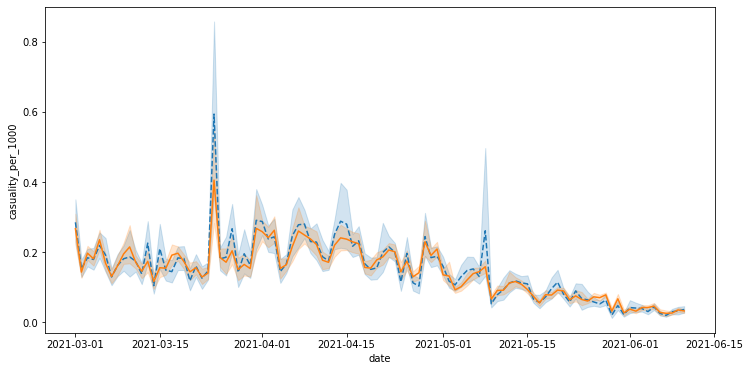

In [202]:
plt.figure(figsize = (12,6))
sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
             y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
             y = plot_test['predicted_cases'],legend = True)

In [203]:
X_test_tr

<43567x56 sparse matrix of type '<class 'numpy.float64'>'
	with 590963 stored elements in Compressed Sparse Row format>

In [204]:
plot_test.head()

,date,state_fips,total_population,number_of_meat_plants,casuality_per_1000,daily_state_test,temperature,virus_pressure,social_distancing_total_grade,political_party,religious_congregation_ratio,gdp_per_capita,day_wk,year,month,quarter,predicted_cases
379957,2021-04-23,25,807252,28,0.214307,92155.0,8.60,176.000000,D-,0,61.0,142.33,4,2021,4,2,0.264275
66859,2020-03-29,6,181827,7,0.000000,1065.0,15.76,17.500000,B-,1,39.0,44.60,6,2020,3,1,0.026593
723974,2021-02-19,42,46222,1,0.194712,41222.0,-4.40,19.400000,D-,1,47.0,34.40,4,2021,2,1,0.285872
378582,2020-04-25,25,705388,5,0.273608,10266.0,5.20,327.333333,C,0,65.0,73.06,5,2020,4,2,0.322725
903549,2020-12-26,51,30650,0,0.326264,58799.0,-2.80,2.428571,D-,1,45.0,35.65,5,2020,12,4,0.032156


In [205]:
plot_test.to_csv('dataset/prediction_xgb.csv',index = False)

In [206]:
# ANN
# from tensorflow.keras.callbacks import EarlyStopping

# ann_model = tf.keras.models.Sequential()
# ann_model.add(tf.keras.layers.Input(shape=(X_train_tr.shape[1],), sparse=True))
# ann_model.add(tf.keras.layers.Dense(126,activation = 'relu'))
# ann_model.add(tf.keras.layers.Dense(126,activation = 'relu'))
# ann_model.add(tf.keras.layers.Dense(1)) 
# ann_model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics=[
#         'MeanSquaredError',
#         'AUC'])
# history = ann_model.fit(X_train_tr,y_train,batch_size = 100, epochs = 150,
#                         validation_data = (X_test_tr,y_test), callbacks = EarlyStopping(patience = 10))


In [207]:
# plt.plot(history.history['loss'], label = 'train')
# plt.plot(history.history['val_loss'], label = 'test')
# plt.legend()
# plt.show()

In [208]:
# y_pred_ann = ann_model.predict(X_test_tr)

# metrics.r2_score(y_test,y_pred_ann)

In [209]:
# np.sqrt(metrics.mean_squared_error(y_test,y_pred_ann))

In [210]:
# plt.figure(figsize = (12,6))
# plot_test = df_train.loc[y_test.index]
# plot_test.head()
# plot_test['predicted_cases'] = y_pred_ann
# sns.lineplot(x = plot_test['date'],
#              y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
# sns.lineplot(x = plot_test['date'],
#              y = plot_test['predicted_cases'],legend = True)

In [211]:
# plt.figure(figsize = (12,6))
# sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
#              y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
# sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
#              y = plot_test['predicted_cases'],legend = True)

In [ ]:
# SVR
# from sklearn.svm import SVR
# svr = SVR(kernel = 'rbf').fit(X_train_tr,y_train)

# y_pred_svr = svr.predict(X_test_tr)

# print(metrics.r2_score(y_test,y_pred_svr))
# print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr)))

In [ ]:
from catboost import CatBoostRegressor

params = {'loss_function':'RMSE',
          'eval_metric':'RMSE',
          'iterations':2000,
          'learning_rate':0.1,
          'cat_features':[0,6,7,10,11,12,13],# need to be handled or encoded
          'verbose':200,
          'random_seed':13}

catmodel = CatBoostRegressor(**params).fit(X_train,y_train,eval_set = (X_test,y_test),use_best_model = True)

In [ ]:
y_pred3 = catmodel.predict(X_test)

metrics.r2_score(y_test,y_pred3)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred3))

In [ ]:
feature_imp = catmodel.get_feature_importance(prettified = True)

plt.figure(figsize = (12,6))
sns.barplot(data = feature_imp, x = 'Feature Id', y = 'Importances')
plt.xticks(rotation = 90)
plt.title('Feature Importance')

In [ ]:
plt.figure(figsize = (12,6))
plot_test = df_train.loc[y_test.index]
plot_test.head()
plot_test['predicted_cases'] = y_pred3
sns.lineplot(x = plot_test['date'],
             y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
sns.lineplot(x = plot_test['date'],
             y = plot_test['predicted_cases'],legend = True)

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
             y = plot_test['covid_19_confirmed_cases'],linestyle='--' ,legend = True)
sns.lineplot(x = plot_test[plot_test['date'] >= '2021-03-01'].date,
             y = plot_test['predicted_cases'],legend = True)